In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Load data
import pandas as pd

def load_wine_data():
    csv_path = os.path.join(r"C:\Users\Sam van Pomeren\Desktop\HWUK\F21DL", "wine.csv")
    return pd.read_csv(csv_path)

def score(Y_true, Y_pred):
    conf_mat = confusion_matrix(Y_true, Y_pred)
    acc_score = accuracy_score(Y_true, Y_pred)
    prec_score = precision_score(Y_true, Y_pred, average=None, zero_division=1)
    rec_score = recall_score(Y_true, Y_pred, average=None, zero_division=1)
    F_score = f1_score(Y_true, Y_pred, average=None, zero_division=1)
    
    
    print("Confusion Matrix = ", 
          conf_mat)
    print("Accuracy score = ",acc_score)
    print("Precision score = ",prec_score)
    print("Recall score = ",rec_score)
    print("F measure = ",F_score)

wine = load_wine_data()
wine.describe()
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [2]:
from sklearn.model_selection import train_test_split

#Finding correlation between the different attributes
corr_matrix = wine.corr()
abs(corr_matrix["quality"].sort_values(ascending=False))


X = wine.iloc[:,[1, 10, 2, 9, 6, 7, 5]]  #independent columns
y = wine["quality"]  



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)


In [4]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42, criterion="gini", min_samples_leaf=10)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=42)

6

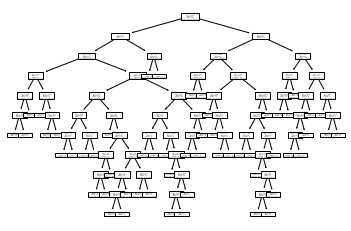

In [5]:
plot_tree(tree_clf)
tree_clf.n_classes_

In [6]:
y_pred1 = tree_clf.predict(X_train)

In [7]:
score(y_train,y_pred1)

Confusion Matrix =  [[  0   0   4   3   0   0]
 [  0   0  16   9   0   0]
 [  0   0 273  45   8   0]
 [  0   0  69 249  18   0]
 [  0   0  11  26  61   0]
 [  0   0   0   3   4   0]]
Accuracy score =  0.7296620775969962
Precision score =  [1.         1.         0.73190349 0.74328358 0.67032967 1.        ]
Recall score =  [0.         0.         0.83742331 0.74107143 0.62244898 0.        ]
F measure =  [0.         0.         0.78111588 0.74217586 0.64550265 0.        ]


In [8]:
cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='accuracy')

C:\Users\Sam van Pomeren\.conda\envs\F21DL\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.5125    , 0.5875    , 0.5125    , 0.5625    , 0.6625    ,
       0.5125    , 0.6       , 0.675     , 0.6125    , 0.69620253])

In [9]:
y_pred2 = tree_clf.predict(X_test)
score(y_test,y_pred2)

Confusion Matrix =  [[  0   0   3   0   0   0]
 [  0   0  19   9   0   0]
 [  0   0 243 104   8   0]
 [  0   0  98 168  36   0]
 [  0   0  11  55  35   0]
 [  0   0   0   2   9   0]]
Accuracy score =  0.5575
Precision score =  [1.         1.         0.64973262 0.49704142 0.39772727 1.        ]
Recall score =  [0.         0.         0.68450704 0.55629139 0.34653465 0.        ]
F measure =  [0.         0.         0.66666667 0.525      0.37037037 0.        ]


In [10]:
score(y_test,y_pred2)

Confusion Matrix =  [[  0   0   3   0   0   0]
 [  0   0  19   9   0   0]
 [  0   0 243 104   8   0]
 [  0   0  98 168  36   0]
 [  0   0  11  55  35   0]
 [  0   0   0   2   9   0]]
Accuracy score =  0.5575
Precision score =  [1.         1.         0.64973262 0.49704142 0.39772727 1.        ]
Recall score =  [0.         0.         0.68450704 0.55629139 0.34653465 0.        ]
F measure =  [0.         0.         0.66666667 0.525      0.37037037 0.        ]


In [11]:
score(y,y)
for x in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=(0.2+(0.15*x)), random_state=42)
    tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42, criterion="gini", min_samples_leaf=2)
    tree_clf.fit(X_train, y_train)
    y_pred_train = tree_clf.predict(X_train)
    y_pred_test = tree_clf.predict(X_test)
    print("Trainsize = ",(0.2+(0.15*x)))
    print("Train")
    score(y_train,y_pred_train)
    print("Test")
    score(y_test,y_pred_test)
    print(" ")

Confusion Matrix =  [[ 10   0   0   0   0   0]
 [  0  53   0   0   0   0]
 [  0   0 681   0   0   0]
 [  0   0   0 638   0   0]
 [  0   0   0   0 199   0]
 [  0   0   0   0   0  18]]
Accuracy score =  1.0
Precision score =  [1. 1. 1. 1. 1. 1.]
Recall score =  [1. 1. 1. 1. 1. 1.]
F measure =  [1. 1. 1. 1. 1. 1.]
Trainsize =  0.2
Train
Confusion Matrix =  [[  3   0   0   0   0   0]
 [  1   9   0   0   0   0]
 [  1   5 118   2   0   0]
 [  1   0  10 130   0   0]
 [  0   1   2   7  28   0]
 [  0   0   0   1   0   0]]
Accuracy score =  0.9028213166144201
Precision score =  [0.5        0.6        0.90769231 0.92857143 1.         1.        ]
Recall score =  [1.         0.9        0.93650794 0.92198582 0.73684211 0.        ]
F measure =  [0.66666667 0.72       0.921875   0.9252669  0.84848485 0.        ]
Test
Confusion Matrix =  [[  0   3   4   0   0   0]
 [  2   9  21  11   0   0]
 [ 19  62 310 159   5   0]
 [  9  27 172 262  27   0]
 [  0   4  21  91  45   0]
 [  0   0   2   9   6   0]]
Accu

In [12]:
from sklearn.ensemble import RandomForestClassifier
score(y,y)
for x in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=(0.2+(0.15*x)), random_state=42)
    tree_clf = RandomForestClassifier(max_depth=10, random_state=42, criterion="gini", min_samples_leaf=2)
    tree_clf.fit(X_train, y_train)
    y_pred_train = tree_clf.predict(X_train)
    y_pred_test = tree_clf.predict(X_test)
    print("Trainsize = ",(0.2+(0.15*x)))
    print("Train")
    score(y_train,y_pred_train)
    print("Test")
    score(y_test,y_pred_test)
    print(" ")

Confusion Matrix =  [[ 10   0   0   0   0   0]
 [  0  53   0   0   0   0]
 [  0   0 681   0   0   0]
 [  0   0   0 638   0   0]
 [  0   0   0   0 199   0]
 [  0   0   0   0   0  18]]
Accuracy score =  1.0
Precision score =  [1. 1. 1. 1. 1. 1.]
Recall score =  [1. 1. 1. 1. 1. 1.]
F measure =  [1. 1. 1. 1. 1. 1.]
Trainsize =  0.2
Train
Confusion Matrix =  [[  0   0   3   0   0   0]
 [  0   7   3   0   0   0]
 [  0   0 123   3   0   0]
 [  0   0   8 133   0   0]
 [  0   0   2   3  33   0]
 [  0   0   0   1   0   0]]
Accuracy score =  0.9278996865203761
Precision score =  [1.         1.         0.88489209 0.95       1.         1.        ]
Recall score =  [0.         0.7        0.97619048 0.94326241 0.86842105 0.        ]
F measure =  [0.         0.82352941 0.92830189 0.94661922 0.92957746 0.        ]
Test
Confusion Matrix =  [[  0   0   5   2   0   0]
 [  0   0  26  17   0   0]
 [  0   2 411 141   1   0]
 [  0   0 172 308  17   0]
 [  0   0   7 115  39   0]
 [  0   0   0  12   5   0]]
Accu

## Conclusion
The algorithm generalizes "Okay" on new data, looking at the 55% in the first try. Not great. Missing the outer values again. Trying some different values in the algorithm gave better outcomes. Decreasing min leaf size gave more chances to outer values. High training accuracy scores, but with bigger training sets some overfitting did appear. The random forest classifier did even better.